# 基于tensorflow的Multi-class Classification及其层的可视化

* 选用kernel learning_dl
~~~
conda activate learning_dl 

# conda remove --name learning_dl --all
# kill -9 +id
~~~

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
np.set_printoptions(precision=2)
from lab_utils_multiclass_TF import *
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

print("finish import module!!!")

finish import module!!!


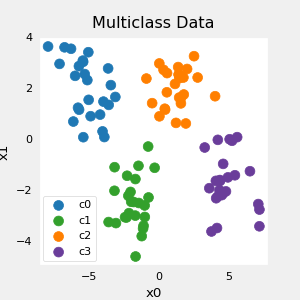

unique classes [0 1 2 3]
class representation [3 3 3 0 3 3 3 3 2 0]
shape of X_train: (100, 2), shape of y_train: (100,)


In [2]:
#首先准备并可视化数据
classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
X_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std,random_state=30)

plt.close("all")
plt_mc(X_train,y_train,classes, centers, std=std)

# show classes in data set
print(f"unique classes {np.unique(y_train)}")
# show how classes are represented
print(f"class representation {y_train[:10]}")
# show shapes of our dataset
print(f"shape of X_train: {X_train.shape}, shape of y_train: {y_train.shape}")


In [ ]:
#定义模型如下
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        Dense(2, activation = 'relu',   name = "L1"),
        Dense(4, activation = 'linear', name = "L2")
    ]
)

# 定义损失函数和优化器
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # 注意上面最后一层为线性层，所以from_logits=True
    optimizer=tf.keras.optimizers.Adam(0.01),
)

# 训练模型
model.fit(
    X_train,y_train,
    epochs=200
)

Epoch 1/200
4/4 [==============================] - 2s 3ms/step - loss: 1.8158
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 1.6976
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 1.5989
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 1.5179
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 1.4369
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 1.3756
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 1.3154
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 1.2621
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 1.2188
Epoch 10/200
4/4 [==============================] - 0s 3ms/step - loss: 1.1791
Epoch 11/200
4/4 [==============================] - 0s 5ms/step - loss: 1.1446
Epoch 12/200
4/4 [==============================] - 0s 3ms/step - loss: 1.1129
Epoch 13/200
4/4 [==============================] - 0s 3ms/st

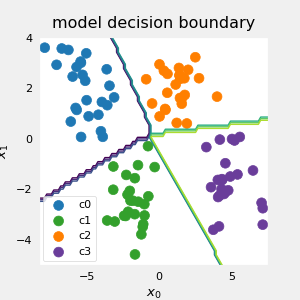

In [4]:
# 将训练效果画出来
plt_cat_mc(X_train, y_train, model, classes)

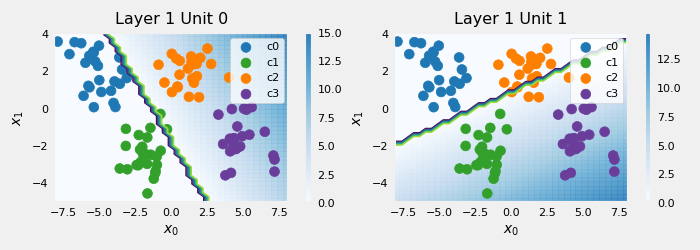

In [5]:
#画出第一层
# gather the trained parameters from the first layer
l1 = model.get_layer("L1")
W1,b1 = l1.get_weights()
# plot the function of the first layer
plt_layer_relu(X_train, y_train.reshape(-1,), W1, b1, classes)

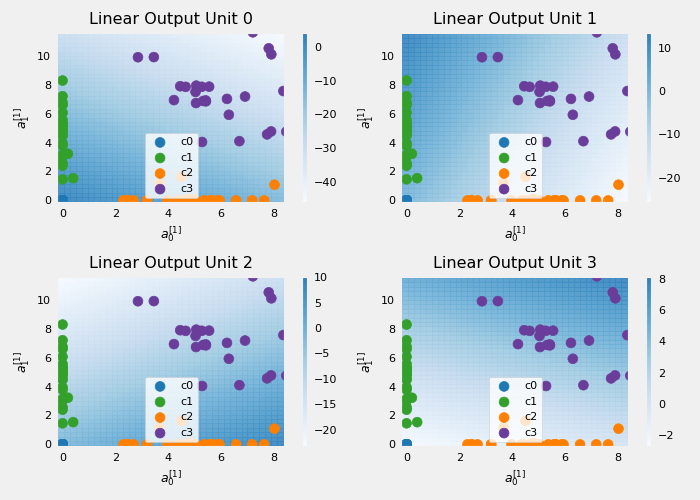

In [6]:
# 画出第二层
# gather the trained parameters from the output layer
l2 = model.get_layer("L2")
W2, b2 = l2.get_weights()
# create the 'new features', the training examples after L1 transformation
Xl2 = np.zeros_like(X_train)
Xl2 = np.maximum(0, np.dot(X_train,W1) + b1)

plt_output_layer_linear(Xl2, y_train.reshape(-1,), W2, b2, classes,
                        x0_rng = (-0.25,np.amax(Xl2[:,0])), x1_rng = (-0.25,np.amax(Xl2[:,1])))

关于上面的每一层的图例的详细解析请见[链接](https://github.com/kaieye/2022-Machine-Learning-Specialization/blob/main/Advanced%20Learning%20Algorithms/week2/5.Multiclass%20Classification/C2_W2_Multiclass_TF.ipynb)